My market research

I want to know what services are people running in the bellow countries and at what rate. The purpose is to draw correct boundries and take informed decisons over how best I could setup a service rate accordig to the country. 


In [7]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2


cmap = sns.diverging_palette(220, 15, as_cmap=True)

In [8]:

c='h.csv'
cohort=pd.read_csv(c, encoding=('ISO-8859-1'), low_memory=False)
print(cohort.head(5))

       Date         Domain  Domain_code  Service_price Country   Country_code
0  6/6/2018  BI_consultant          117             85      Ger           303
1  6/3/2018  BI_consultant          117            119      Ger           303
2  6/6/2018  Py_automation          101             30      Ger           303
3  6/6/2018   Marketing_DA          104             65      Ger           303
4  6/6/2018   Excel_Expert          102             29      Ger           303


What is the average service rate for the domains below?

In [9]:
# contingency price table

hourly=['Domain', 'Country ']
cm=sns.color_palette='PuBu'
round(pd.crosstab(cohort[hourly[0]], cohort[hourly[1]], values=cohort['Service_price'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap=cm)


Country,Australia,Belgium,Fra,Ger,Luxembourg,Neth,Romania
Domain,,,,,,,
BA,55.000000,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000
BI_Architect,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
BI_VBA,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
BI_consultant,71.670000,65.750000,53.750000,71.140000,78.330000,59.500000,52.750000
DA,51.000000,51.250000,45.570000,70.500000,48.250000,50.000000,34.000000
DA_Architect,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,0.000000
DA_Conversion_R,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000
DA_Excel,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000
DA_Scraping,0.000000,0.000000,0.000000,50.000000,35.000000,0.000000,0.000000


How many jobs per domain in these countries?

In [10]:
#contingency no.of.jobs table 

hourly=['Domain', 'Country ']
cm=sns.colormap='Blues'
pd.crosstab(cohort[hourly[0]], cohort[hourly[1]], values=cohort['Service_price'], margins=True, aggfunc='count').fillna(0).style.background_gradient(cmap=cm)

Country,Australia,Belgium,Fra,Ger,Luxembourg,Neth,Romania,All
Domain,,,,,,,,
BA,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
BI_Architect,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
BI_VBA,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
BI_consultant,12.000000,12.000000,8.000000,7.000000,3.000000,10.000000,4.000000,56
DA,5.000000,4.000000,7.000000,4.000000,4.000000,6.000000,5.000000,35
DA_Architect,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
DA_Conversion_R,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
DA_Excel,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
DA_Scraping,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2


In [11]:
#contingency no.of.jobs table 
Germany=cohort[cohort.Country_code==303] 

#contingency no.of.jobs table 

germany=['Domain', 'Country ']
cm=sns.colormap='BuGn'
pd.crosstab(Germany[germany[0]], Germany[germany[1]], values=Germany['Service_price'], aggfunc='mean', margins=True).fillna(0).style.background_gradient(cmap=cm)

Country,Ger,All
Domain,,
BI_Architect,60.000000,60.000000
BI_VBA,30.000000,30.000000
BI_consultant,71.142857,71.142857
DA,70.500000,70.500000
DA_Conversion_R,55.000000,55.000000
DA_Scraping,50.000000,50.000000
Data_Science,100.000000,100.000000
Excel_Expert,29.000000,29.000000
Marketing_DA,80.000000,80.000000


In [12]:
Belgium=cohort[cohort.Country_code==300] 

belgeium=['Domain', 'Country ']
cm=sns.colormap='BuGn'
pd.crosstab(Belgium[belgeium[0]], Belgium[belgeium[1]], values=Belgium['Service_price'], aggfunc='mean', margins=True).fillna(0).style.background_gradient(cmap=cm)

Country,Belgium,All
Domain,,
BA,73.750000,73.750000
BI_consultant,65.750000,65.750000
DA,51.250000,51.250000
Data_Science,75.000000,75.000000
Data_visualization,53.333333,53.333333
All,64.384615,64.384615


In [13]:
Australia=cohort[cohort.Country_code==320] 

australia=['Domain', 'Country ']
cm=sns.colormap='BuGn'
pd.crosstab(Australia[australia[0]], Australia[australia[1]], values=Australia['Service_price'], aggfunc='mean', margins=True).fillna(0).style.background_gradient(cmap=cm)

Country,Australia,All
Domain,,
BA,55.000000,55.000000
BI_consultant,71.666667,71.666667
DA,51.000000,51.000000
Data_Science,71.250000,71.250000
Data_visualization,41.666667,41.666667
All,63.200000,63.200000


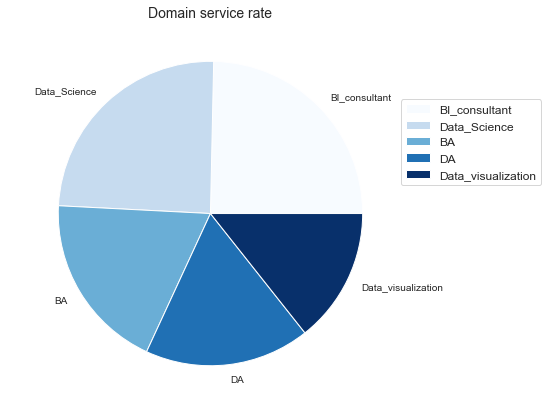

In [14]:
sns.set_style("whitegrid")
df = Australia.groupby('Domain').agg({'Service_price': 'mean'}).sort_values('Service_price', ascending=False)


ax = df.plot.pie(y='Service_price', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

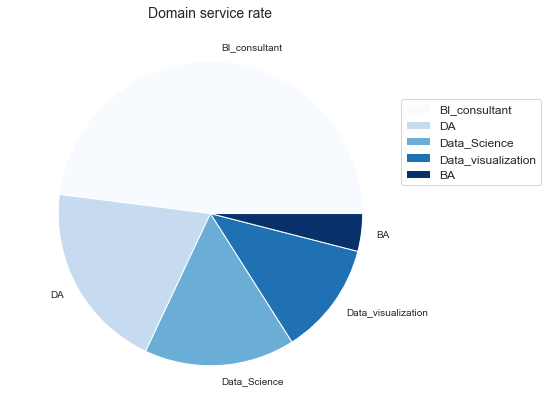

In [15]:
sns.set_style("whitegrid")
df = Australia.groupby('Domain').agg({'Service_price': 'count'}).sort_values('Service_price', ascending=False)


ax = df.plot.pie(y='Service_price', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

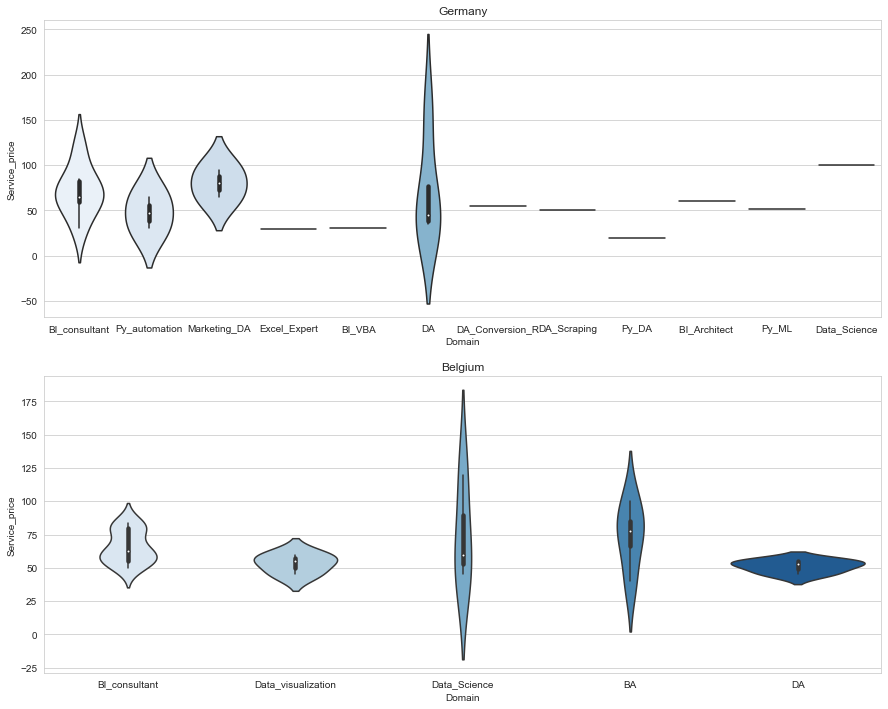

In [16]:
#violin
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, figsize=(15, 12), sharex=False)

sns.violinplot(x=Germany["Domain"], y=Germany["Service_price"], palette="Blues", ax=axes[0]).set_title('Germany')
sns.violinplot(x=Belgium["Domain"], y=Belgium["Service_price"], palette="Blues", ax=axes[1]).set_title('Belgium')
plt.show()

Which domain is best needed and paid?

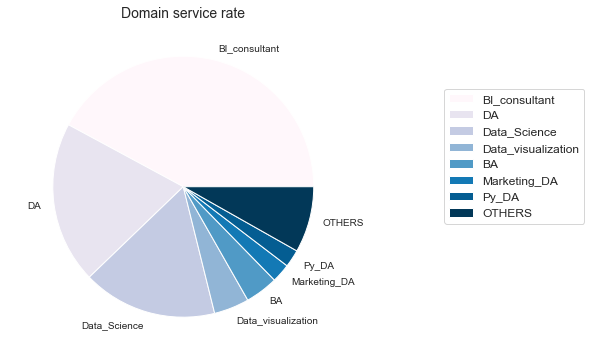

In [17]:
#pie chart 

sns.set_style("whitegrid")
df = cohort.groupby('Domain').agg({'Service_price': 'sum'}).sort_values('Service_price', ascending=False)

OTHERS = df.iloc[7:].sum()
df.drop(df.iloc[7:].index.tolist(), inplace=True)
df.loc['OTHERS'] = OTHERS

ax = df.plot.pie(y='Service_price', figsize=(6, 6), colormap='PuBu')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.3, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

What is the intensity of BI consultant in the countries

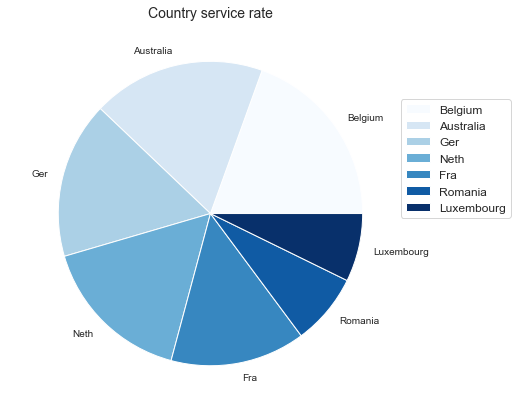

In [21]:
sns.set_style("whitegrid")
df = cohort.groupby('Country ').agg({'Service_price': 'sum'}).sort_values('Service_price', ascending=False)


ax = df.plot.pie(y='Service_price', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Country service rate', fontsize=14)
plt.show()

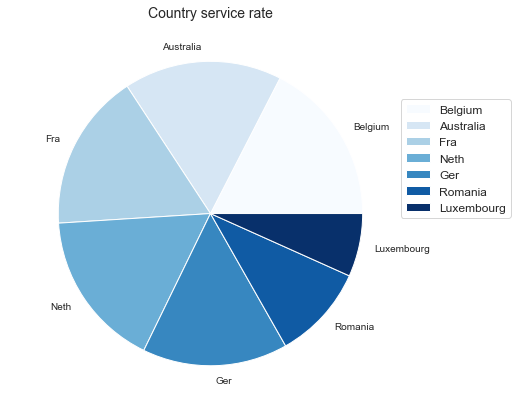

In [22]:
sns.set_style("whitegrid")
df = cohort.groupby('Country ').agg({'Domain': 'count'}).sort_values('Domain', ascending=False)


ax = df.plot.pie(y='Domain', figsize=(7, 7), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Country service rate', fontsize=14)
plt.show()

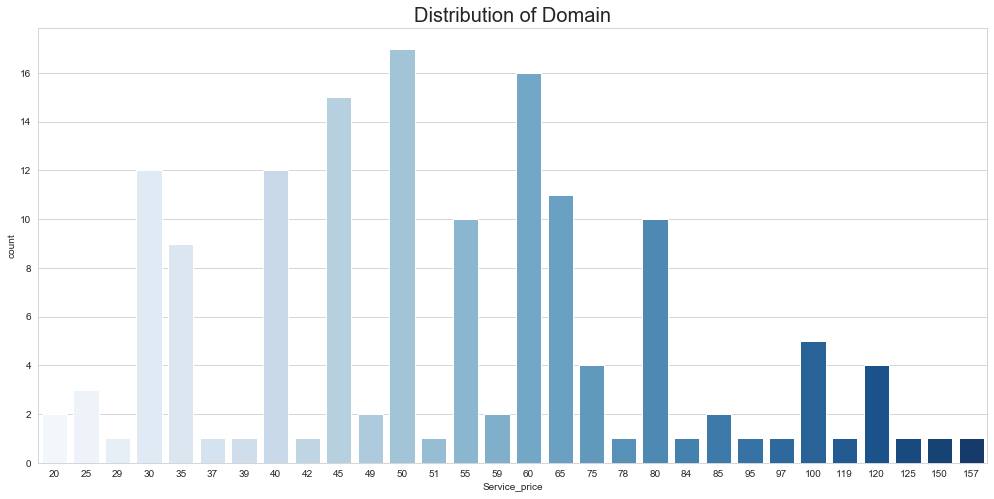

In [23]:
# distribution bar

plt.rcParams['figure.figsize'] = (17, 8)
sns.countplot(cohort['Service_price'], palette = 'Blues')
plt.title('Distribution of Domain', fontsize = 20)
plt.show()

Clusters

In [17]:

c='cluster.csv'
cluster=pd.read_csv(c, encoding=('ISO-8859-1'), low_memory=False)
print(cluster)

     CustomerID         Domain  Service_price  Annual Income (k$)  \
0             1  BI_consultant             85                  15   
1             2  BI_consultant            119                  15   
2             3  Py_automation             30                  16   
3             4   Marketing_DA             65                  16   
4             5   Excel_Expert             29                  17   
..          ...            ...            ...                 ...   
144         145  BI_consultant             65                  77   
145         146  BI_consultant             60                  77   
146         147  BI_consultant             80                  77   
147         148  BI_consultant             55                  77   
148         149  BI_consultant             65                  78   

     Spending_patt  
0               39  
1               81  
2                6  
3               77  
4               40  
..             ...  
144             12  
145

KMeans Algo

In [18]:
x = cluster.iloc[:, [4, 2]].values

In [19]:
# let's check the shape of x
print(x.shape)

(149, 2)


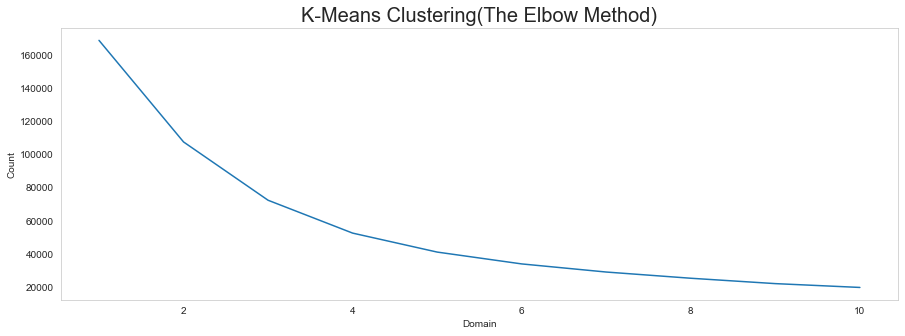

In [20]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Domain')
plt.ylabel('Count')
plt.grid()
plt.show()


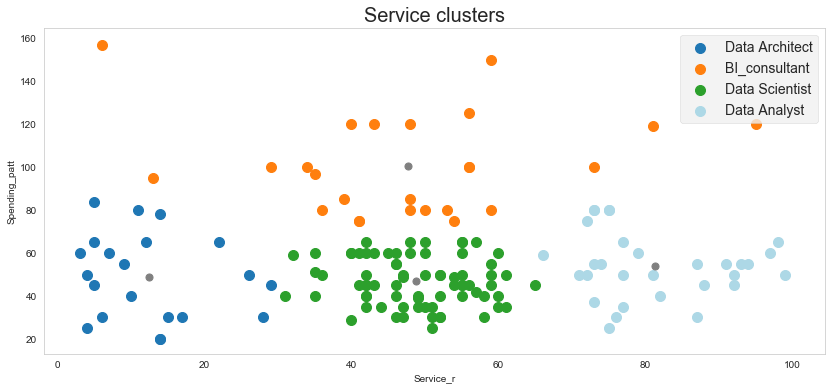

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (14, 6)
plt.title('Service clusters', fontsize = 20)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, cmap= 'viridis', label = 'Data Architect' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, cmap= 'Blues', label = 'BI_consultant')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, cmap= 'BuGn', label = 'Data Scientist')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'lightblue', label = 'Data Analyst')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'gray')

plt.style.use('fivethirtyeight')
plt.xlabel('Service_r')
plt.ylabel('Spending_patt')
plt.legend()
plt.grid()
plt.show()

In [22]:
y = cluster.iloc[:, [2, 3]].values
#print(y)

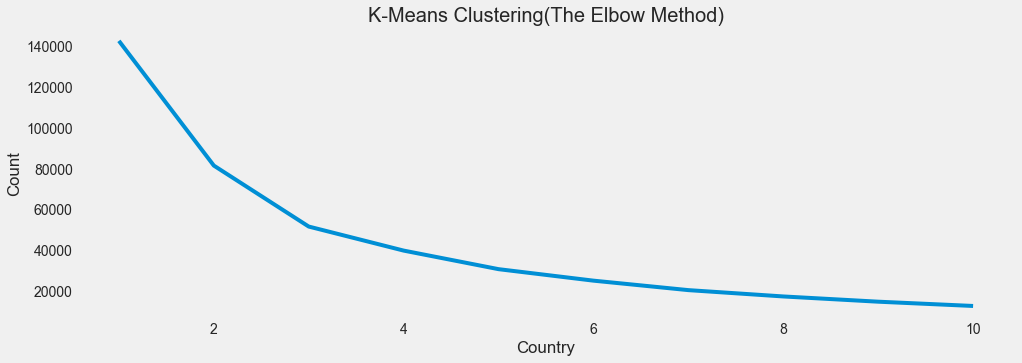

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Count')
plt.grid()
plt.show()

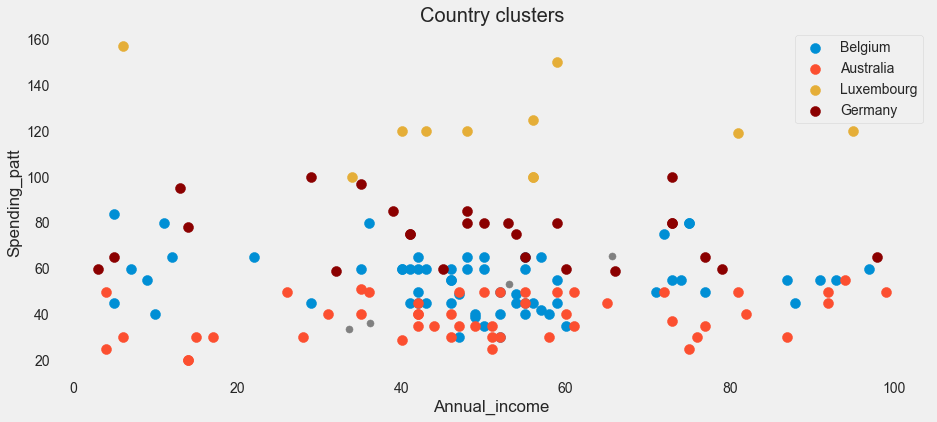

In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(y)

plt.rcParams['figure.figsize'] = (14, 6)
plt.title('Country clusters', fontsize = 20)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, cmap= 'viridis', label = 'Belgium' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, cmap= 'Blues', label = 'Australia')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, cmap= 'BuGn', label = 'Luxembourg')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'darkred', label = 'Germany')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s = 50, c = 'gray')

plt.style.use('fivethirtyeight')
plt.xlabel('Annual_income')
plt.ylabel('Spending_patt')
plt.legend()
plt.grid()

Cluster Hierarchy

In [25]:
z = cluster[['Service_price','Annual Income (k$)', 'Spending_patt']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(z)
labels = km.labels_
centroids = km.cluster_centers_

In [26]:
cluster['labels'] =  labels
trace1 = go.Scatter3d(
    x= cluster['Spending_patt'],
    y= cluster['Annual Income (k$)'],
    z= cluster['Service_price'],
    mode='markers',
     marker=dict(
        color = cluster['labels'], 
        size= 10,
        line=dict(
            color= cluster['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Clusters',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Spending'),
            yaxis = dict(title  = 'Income'),
            zaxis = dict(title  = 'Rate')
        )
)

fig = go.Figure(data = df, layout = layout)
#plotly.offline.plot(fig, filename='r')

BA jobs distribution

In [58]:

c='BusinessAnalyst1.csv'
bus=pd.read_csv(c, encoding=('ISO-8859-1'), low_memory=False)
print(bus)

     Founding_Year                                          Job_Title  \
0             2000   Business Analyst - Clinical & Logistics Platform   
1             1994                                   Business Analyst   
2             2004                                       Data Analyst   
3             1897    Information Security Analyst, Incident Response   
4             2007                      Analyst - FP&A Global Revenue   
..             ...                                                ...   
624           1978                                  Marketing Analyst   
625           1948                                       Data Analyst   
626           2008                                       Data Analyst   
627           1967  Senior Business Analyst â Business Relations...   
628           2000                                       Data Analyst   

     Salary_Estimate_k  Rating                   Company_Name  \
0                  102     3.9  Memorial Sloan-Kettering\n

In [59]:
ba= cluster.iloc[:, [0,4]].values
#print(ba)

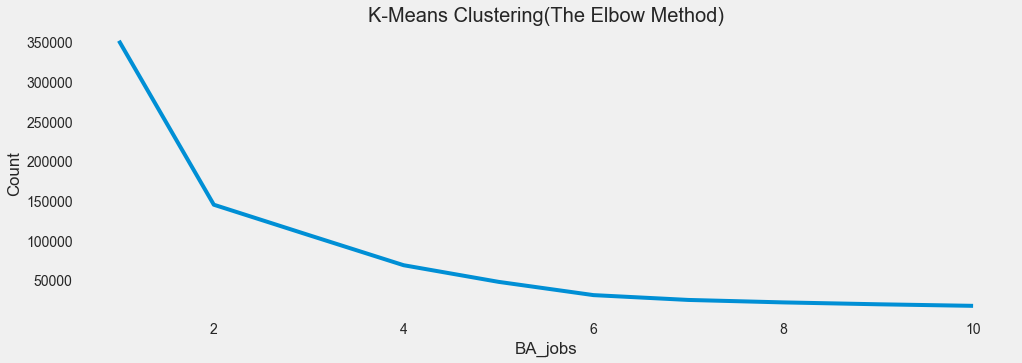

In [60]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(ba)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('BA_jobs')
plt.ylabel('Count')
plt.grid()
plt.show()

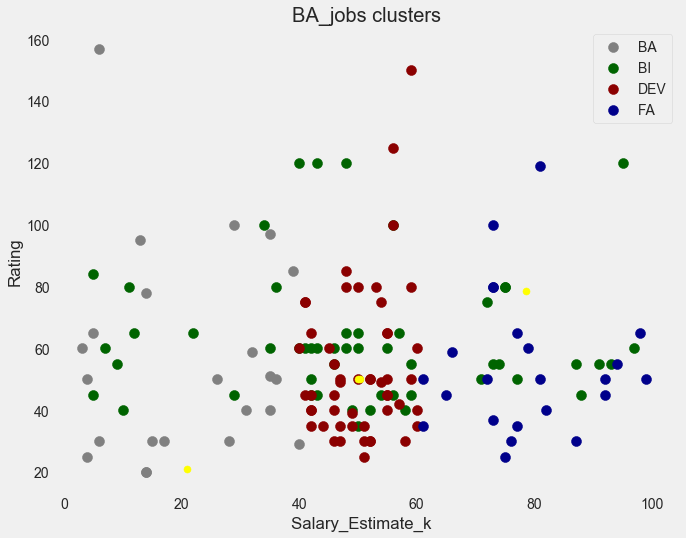

In [57]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(ba)

plt.rcParams['figure.figsize'] = (10, 8)
plt.title('BA_jobs clusters', fontsize = 20)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c= 'gray', label = 'BA' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c= 'darkgreen', label = 'BI')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c= 'darkred', label = 'DEV')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'darkblue', label = 'FA')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow')

plt.style.use('fivethirtyeight')
plt.xlabel('Salary_Estimate_k  ')
plt.ylabel('Rating')
plt.legend()
plt.grid()